In [1]:
import openmc

In [88]:
LaBr_detector_mat = openmc.Material(name='LaBr_detector')
LaBr_detector_mat.add_nuclide('Br79', 0.2946, 'wo')
LaBr_detector_mat.add_nuclide('Br81', 0.3069, 'wo')
LaBr_detector_mat.add_nuclide('La139', 0.3485, 'wo')
LaBr_detector_mat.add_nuclide('Ce140', 0.0500, 'wo')
LaBr_detector_mat.set_density('atom/b-cm', 5.08)

lead_mat = openmc.Material(name='lead')
lead_mat.add_nuclide('Pb207', 1)
lead_mat.set_density('atom/b-cm', 11.29)

air_mat = openmc.Material(name='air')
air_mat.add_nuclide('O16', 0.23, 'wo')
air_mat.add_nuclide('N14', 0.77, 'wo')
air_mat.set_density('g/cm3', 0.00129)

soil_mat = openmc.Material(name='soil')
soil_mat.add_nuclide('C6', 0.15, 'wo')
soil_mat.add_nuclide('Si14', 0.374, 'wo')
soil_mat.add_nuclide('O16', 0.4675, 'wo')
soil_mat.add_nuclide('H1', 0.0085, 'wo')
soil_mat.set_density('g/cm3', 1.6)

In [89]:
mats = openmc.Materials([LaBr_detector_mat, lead_mat, air_mat, soil_mat])
mats.export_to_xml()

In [83]:
def xrcc(y0, z0, x0, r, h):
    tube = openmc.XCylinder(y0=y0, z0=z0, r=r)
    bottom = openmc.XPlane(x0=x0)
    top = openmc.XPlane(x0=x0+h)
    return -tube & +bottom & -top

def rpp(x0, y0, z0, x1, y1, z1):
    return +openmc.XPlane(x0=x0) & -openmc.XPlane(x0=x1) & +openmc.YPlane(y0=y0) & -openmc.YPlane(y0=y1) & +openmc.ZPlane(z0=z0) & -openmc.ZPlane(z0=z1)

In [84]:
can = xrcc(0, 0, 0, 1, 1)
box = rpp(-1, -1, -1, 1, 1, 1)

In [85]:
can.get_surfaces().keys()

dict_keys([45, 46, 47])

In [90]:
soil_surface = rpp(x0=-500, x1=500, y0=-500, y1=500, z0=48, z1=348)
soil_cell = openmc.Cell(region=soil_surface, fill=soil_mat)
root = openmc.Universe(cells=[soil_cell])
geom = openmc.Geometry(root)
geom.export_to_xml()

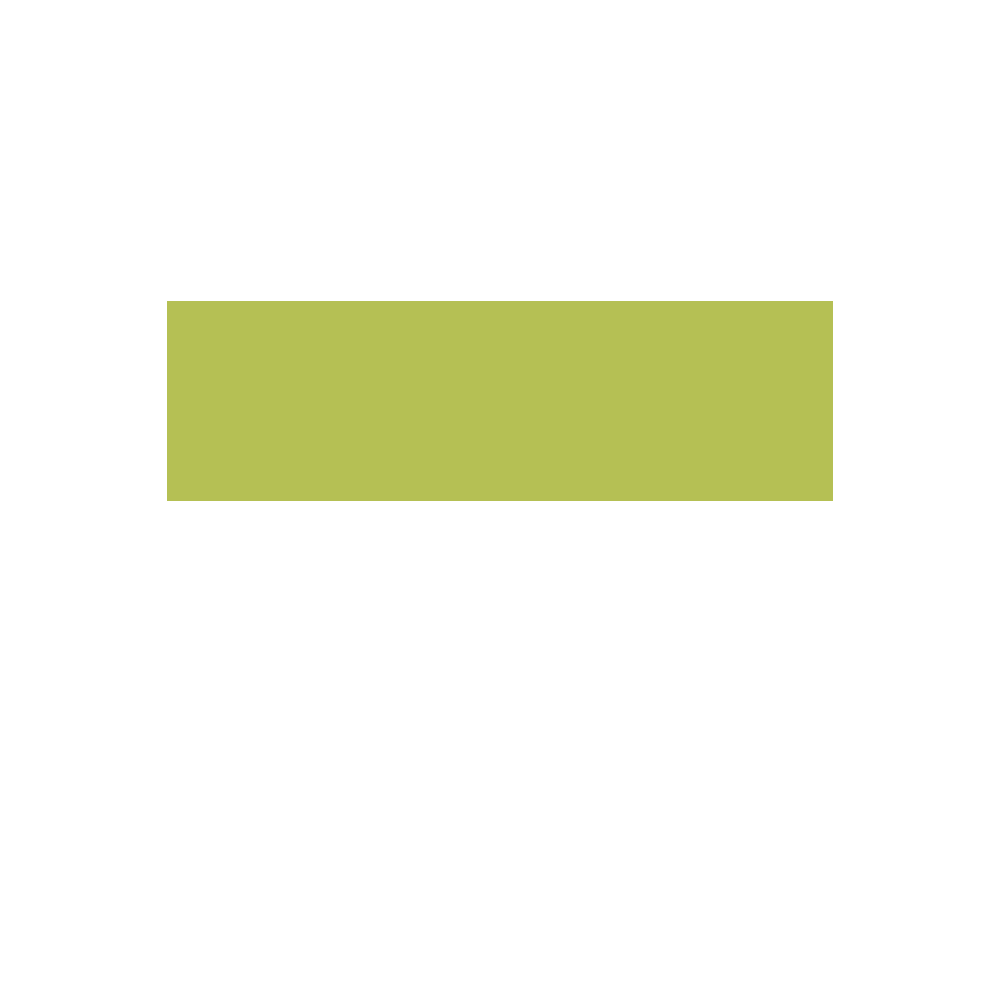

In [98]:
plot = openmc.Plot.from_geometry(geom, basis='yz')
plot.filename = 'plot'
plot.origin = (0, 0, 50)
plot.width = (1500, 1500)
plot.pixels = (1000, 1000)
openmc.plot_inline(plot)
